Importing the libraries

In [65]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as sklearn_accuracy_score
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import joblib
from sklearn.pipeline import Pipeline

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [5]:
dataset=pd.read_csv('WELFake_Dataset.csv')

In [6]:
dataset.shape

(72134, 4)

In [7]:
dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [8]:
dataset.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [9]:
dataset=dataset.fillna('')

In [10]:
dataset.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [11]:
dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [12]:
dataset ['content']= dataset['text'] +' ' +dataset['title']

In [13]:
print(dataset['content'])

0        No comment is expected from Barack Obama Membe...
1          Did they post their votes for Hillary already? 
2         Now, most of the demonstrators gathered last ...
3        A dozen politically active pastors came here f...
4        The RS-28 Sarmat missile, dubbed Satan 2, will...
                               ...                        
72129    WASHINGTON (Reuters) - Hackers believed to be ...
72130    You know, because in fantasyland Republicans n...
72131    Migrants Refuse To Leave Train At Refugee Camp...
72132    MEXICO CITY (Reuters) - Donald Trump’s combati...
72133    Goldman Sachs Endorses Hillary Clinton For Pre...
Name: content, Length: 72134, dtype: object


In [14]:
dataset.head()

,Unnamed: 0,title,text,label,content
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,No comment is expected from Barack Obama Membe...
1,1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,"Now, most of the demonstrators gathered last ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,A dozen politically active pastors came here f...
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"The RS-28 Sarmat missile, dubbed Satan 2, will..."


In [15]:
X = dataset.drop(columns='label', axis=1)
Y = dataset['label']

In [16]:
print(X)
print(Y)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                      
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  \
0      No comment is expected from Barack Obama Membe...   
1         Did t

<Axes: xlabel='label', ylabel='count'>

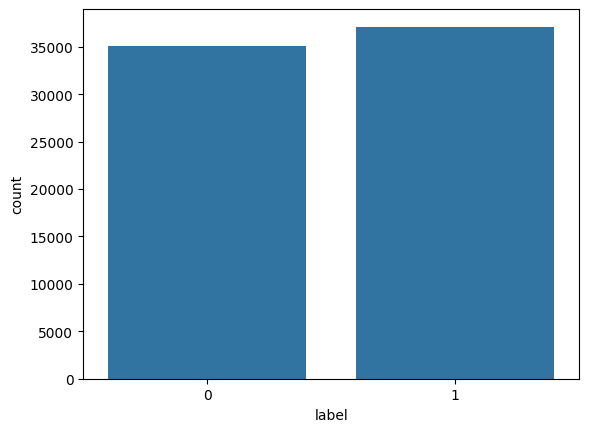

In [17]:
sns.countplot(data=dataset,x=dataset['label'])

Stemming:

In [18]:
port_stem=PorterStemmer()

In [19]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [20]:
dataset['content'] = dataset['content'].apply(stemming)

In [21]:
print(dataset['content'])

0        comment expect barack obama member fyf fukyofl...
1                                post vote hillari alreadi
2        demonstr gather last night exercis constitut p...
3        dozen polit activ pastor came privat dinner fr...
4        rs sarmat missil dub satan replac ss fli mile ...
                               ...                        
72129    washington reuter hacker believ work russian g...
72130    know fantasyland republican never question cit...
72131    migrant refus leav train refuge camp hungari t...
72132    mexico citi reuter donald trump comb style buf...
72133    goldman sach endors hillari clinton presid gol...
Name: content, Length: 72134, dtype: object


In [76]:
X = dataset['content'].values
Y = dataset['label'].values

In [77]:
print(X)

['comment expect barack obama member fyf fukyoflag blacklivesmatt movement call lynch hang white peopl cop encourag other radio show tuesday night turn tide kill white peopl cop send messag kill black peopl america one f yoflag organ call sunshin radio blog show host texa call sunshin f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urg support call fyf tonight continu dismantl illus white snapshot twitter radio call invit fyf radio show air p eastern standard time show caller clearli call lynch kill white peopl minut clip radio show heard provid breitbart texa someon would like refer hannib alreadi receiv death threat result interrupt fyf confer call unidentifi black man said mother f ker start f ing like us bunch ni er takin one us roll said caus alreadi roll gang anyway six seven black mother f cker see white person lynch ass let turn tabl conspir cop start lose peopl state emerg specul one two thing would happen big ass r war ni er go start backin alreadi ge

In [78]:
print(Y)

[1 1 1 ... 0 0 1]


In [79]:
Y.shape

(72134,)

sepating the dataset

In [82]:
X_train,X_test,Y_train,y_test=train_test_split(X,Y,train_size=0.8,stratify=Y,random_state=2)

In [83]:
def scores(y_test, y_pred, model):
    cr = classification_report(y_test, y_pred)
    print('Classification report:\n', cr, '\n')

    # Scores
    score_train = round(model.score(X_train, Y_train), 3)
    score_test = round(model.score(X_test, y_test), 3)
    print('Training Score: ', score_train)
    print('Testing Score: ', score_test)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

MODELS




LogisticRegression


Classification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7006
           1       0.94      0.96      0.95      7421

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427
 

Training Score:  0.963
Testing Score:  0.949


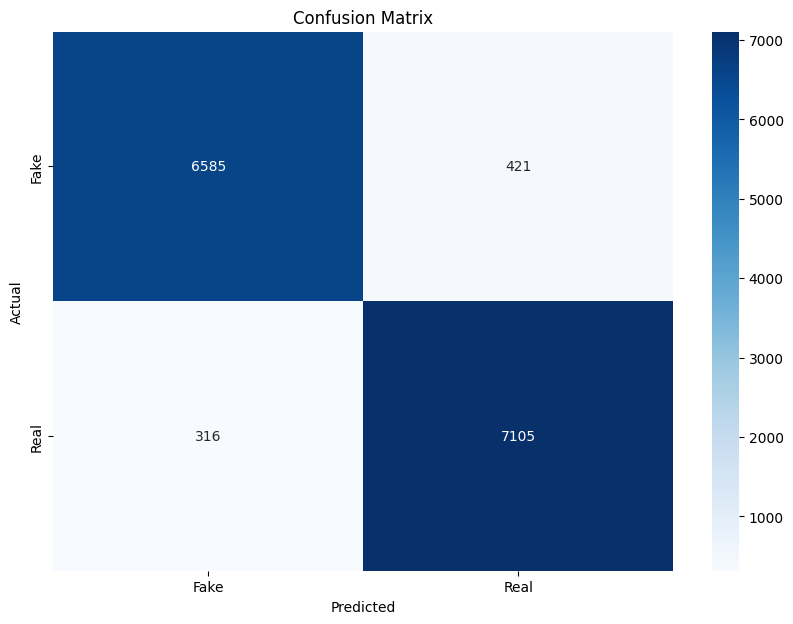

In [84]:
logistic_regression_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline to the raw text data
logistic_regression_pipeline.fit(X_train, Y_train)

# Make predictions
pred = logistic_regression_pipeline.predict(X_test)

# Evaluate the model
scores(y_test, pred, logistic_regression_pipeline)

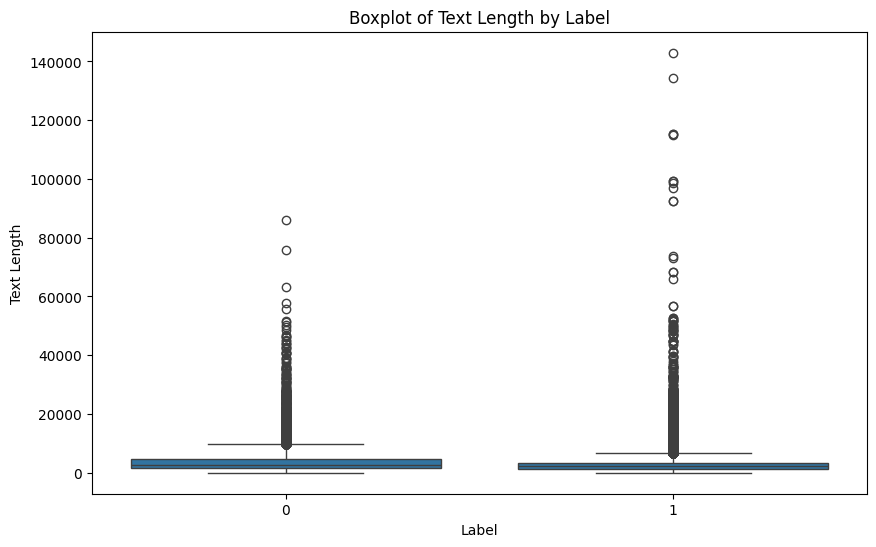

In [85]:
dataset['text_length'] = dataset['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=dataset)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

Random forest

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      7006
           1       0.84      0.93      0.88      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427
 

Training Score:  0.881
Testing Score:  0.869


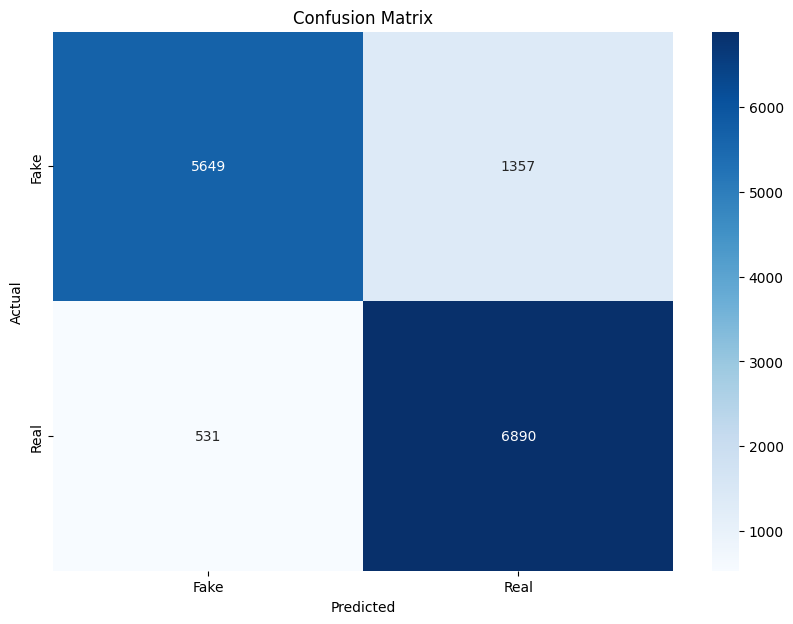

In [86]:
random_forest_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=1000, random_state=10, max_depth=9, n_jobs=-1))
])
random_forest_pipeline.fit(X_train, Y_train)
rfc_pred = random_forest_pipeline.predict(X_test)
scores(y_test, rfc_pred, random_forest_pipeline)


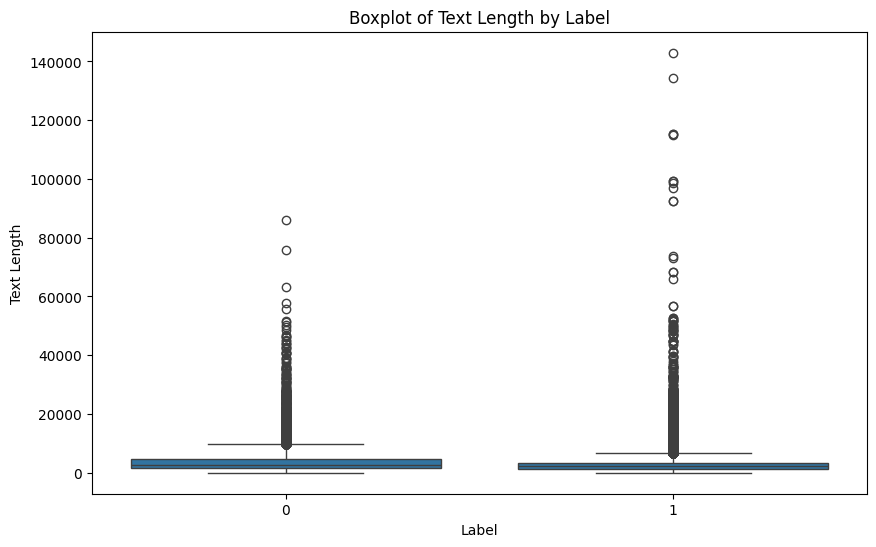

In [53]:
dataset['text_length'] = dataset['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=dataset)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

Multinomial Naive Bayes

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      7006
           1       0.87      0.88      0.88      7421

    accuracy                           0.87     14427
   macro avg       0.87      0.87      0.87     14427
weighted avg       0.87      0.87      0.87     14427
 

Training Score:  0.882
Testing Score:  0.871


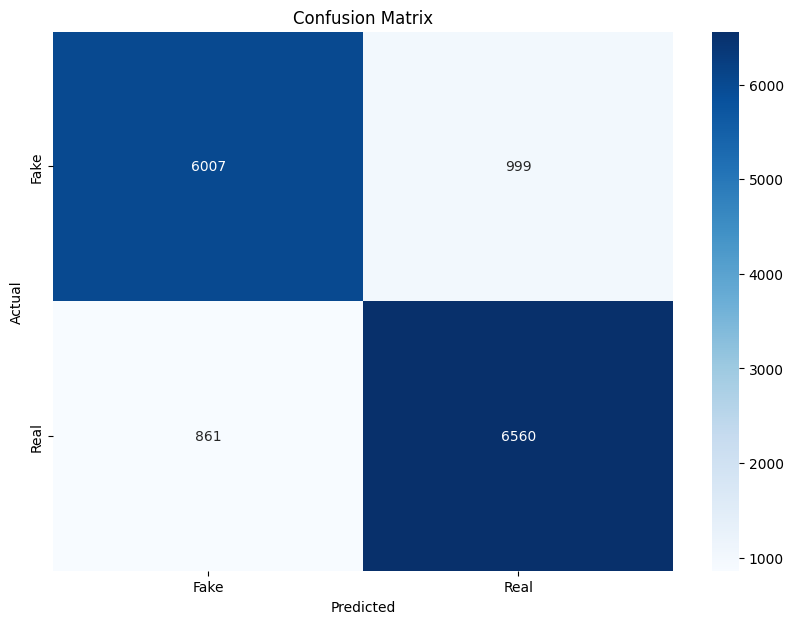

In [87]:
naive_bayes_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])
naive_bayes_pipeline.fit(X_train, Y_train)
mnb_pred = naive_bayes_pipeline.predict(X_test)
scores(y_test, mnb_pred, naive_bayes_pipeline)


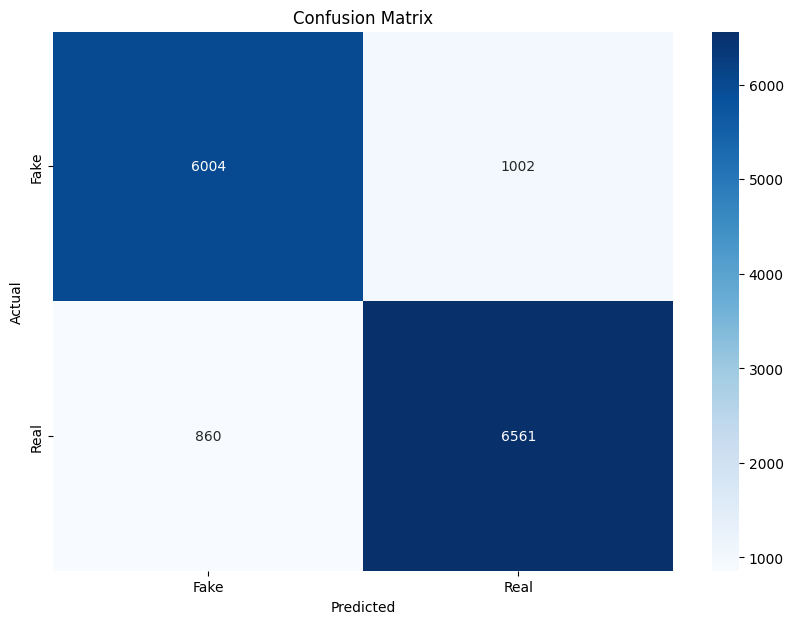

In [45]:
conf_matrix = confusion_matrix(y_test, mnb.predict(X_test))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

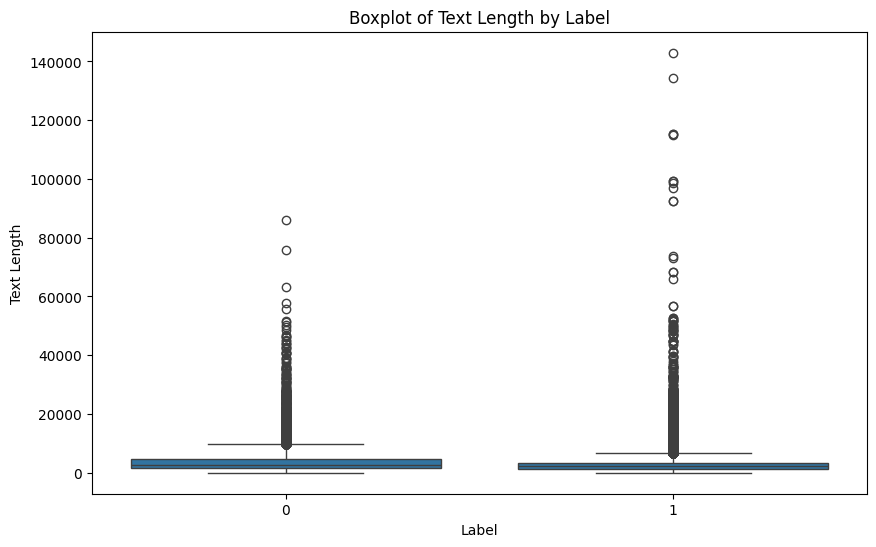

In [52]:
dataset['text_length'] = dataset['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=dataset)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

 Support Vector Machine (SVM) 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      7006
           1       0.96      0.96      0.96      7421

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427
 

Training Score:  0.981
Testing Score:  0.96


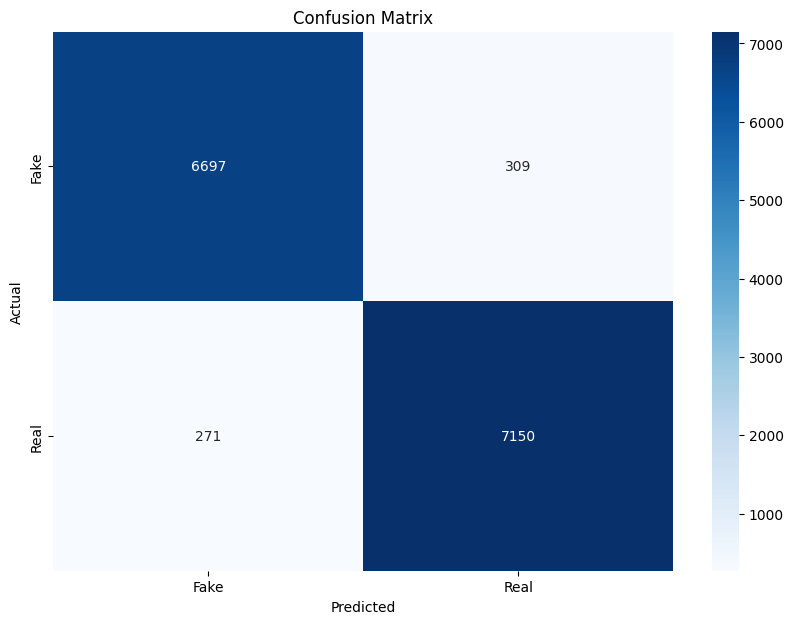

In [88]:
svm_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear', random_state=42))
])
svm_pipeline.fit(X_train, Y_train)
y_pred = svm_pipeline.predict(X_test)
scores(y_test, y_pred, svm_pipeline)

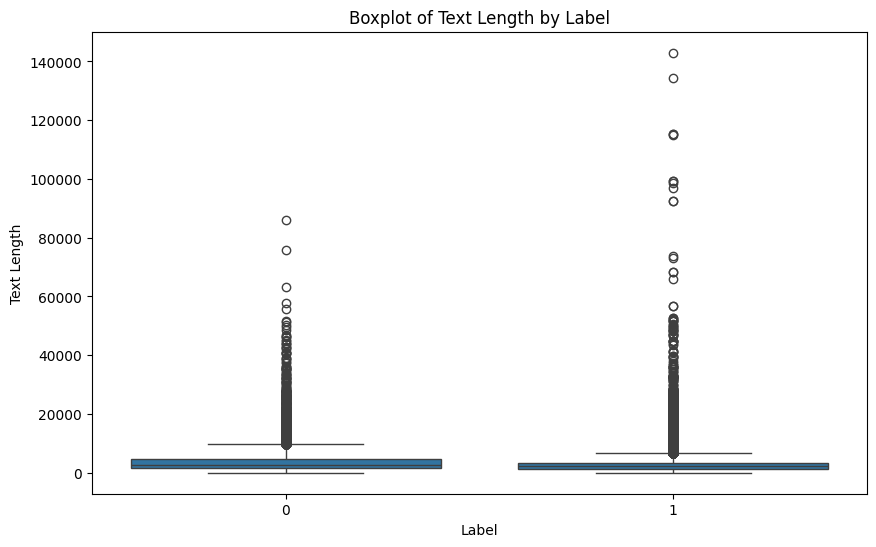

In [51]:
dataset['text_length'] = dataset['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=dataset)
plt.title('Boxplot of Text Length by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

In [90]:
joblib.dump(svm_pipeline, 'best_model.pkl')

['best_model.pkl']